**K-Means Concept for Data Clasteritation**

Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Pengantar K-Means

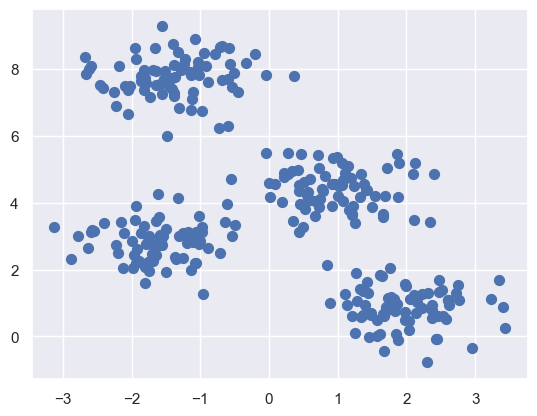

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

This code generates a synthetic dataset using the make_blobs function from sklearn.datasets. It creates 300 samples with 4 centers (clusters) and a standard deviation of 0.60 for each cluster. The random_state parameter ensures reproducibility.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

This code performs K-means clustering on the generated dataset X. It uses the KMeans algorithm from scikit-learn with n_clusters=4, meaning it will try to cluster the data into 4 clusters. The fit method is used to fit the K-means model to the data, and then the predict method is used to assign each data point to a cluster. After running this code, the y_kmeans variable will contain the cluster labels assigned to each data point in X based on the K-means clustering.

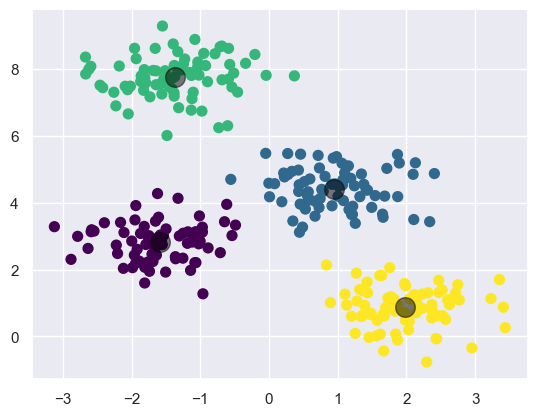

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

This code generates a scatter plot of the data points in X colored according to their assigned clusters (y_kmeans) and overlays the cluster centers as large black points.

Algoritma Expectation-Maximization

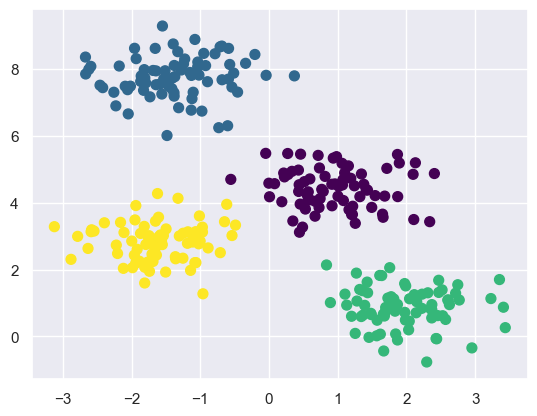

In [5]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In this code, the find_clusters function is defined to perform the K-means clustering algorithm manually. The resulting cluster centers and labels are then used to create a scatter plot:
- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): This line creates a scatter plot of the input data points. The c=labels argument colors the points based on their cluster assignments, s=50 sets the size of the points, and cmap='viridis' specifies the colormap used for coloring the points based on cluster assignments.

Perubahan Random

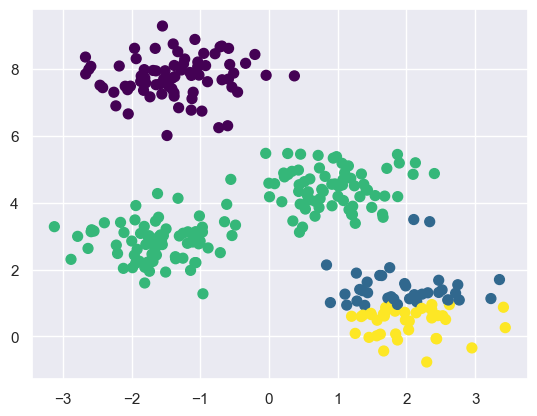

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

The code uses the find_clusters function to perform K-means clustering on the dataset X with 4 clusters. This scatter plot shows the clustering of the data points into four clusters based on the K-means algorithm with the specified random seed.

Optimalisasi Jumlah Klaster

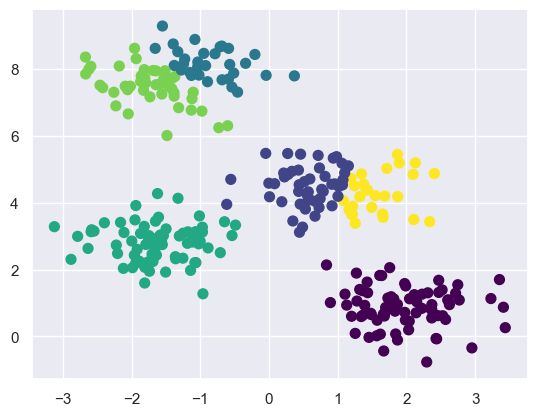

In [7]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

This scatter plot visualizes the clustering of the data points into six clusters using the K-means algorithm with a random seed of 0. The clusters are represented by different colors in the plot.

Batas Klaster yang Tidak Selalu Linier

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

In the code snippet, we are generating a synthetic dataset using the make_moons function from scikit-learn's datasets module. The make_moons function creates a two-class classification dataset in the shape of two interleaving half circles. After executing this code, the variables X and y will contain the generated data points and their corresponding labels, respectively. X will be a 2D array representing the coordinates of the data points, and y will be a 1D array containing binary labels (0 or 1) indicating the class membership of each data point.

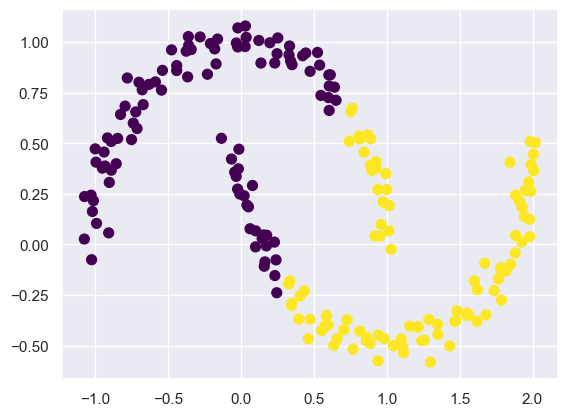

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

In this code snippet, we are applying the KMeans clustering algorithm to the X dataset, which contains the generated data points from the make_moons function. The KMeans algorithm is used to cluster the data into two clusters (n_clusters=2). The random_state=0 parameter ensures reproducibility of the results. After fitting the KMeans model to the data using the fit_predict method, we obtain cluster labels for each data point. These cluster labels are stored in the labels variable.

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


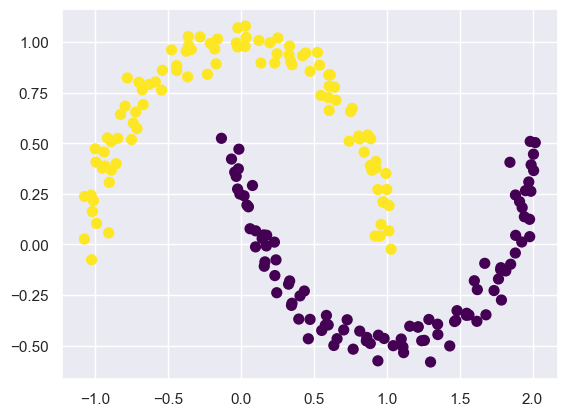

In [10]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In this code snippet, we are using Spectral Clustering, a technique that uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower-dimensional space.

**Studi Kasus 1: Karakter Angka**

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

This code gives us the shape of the data array in the digits dataset. In this case, it will return a tuple representing the dimensions of the data array. The first dimension represents the number of samples (images), and the second dimension represents the number of features (pixels in each image).

In [12]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In this case, kmeans.cluster_centers_.shape will return (10, 64), indicating that there are 10 cluster centers, and each cluster center is represented by a 1-dimensional array of 64 values. Each value in the cluster center array corresponds to the intensity of a pixel in the 8x8 image.

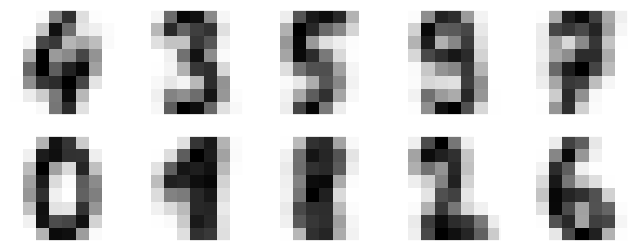

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

The kmeans.cluster_centers_.reshape(10, 8, 8) reshapes the cluster centers from a flat array back into the 3D array representing the images. Then, the loop iterates over the subplots, setting ticks to empty lists and displaying each cluster center image using axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary). The resulting grid of subplots shows the cluster centers as images, allowing us to visually inspect what each cluster represents.

In [15]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_19252\1054570171.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


After running this code, the labels array will contain the assigned labels for each data point in the digits dataset based on the clusters formed by K-Means. These labels represent the predicted digit classes for each data point according to the clustering.

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

The accuracy_score function from Scikit-Learn's metrics module is used to calculate the accuracy of the clustering model by comparing the predicted labels (labels) with the true labels (digits.target).

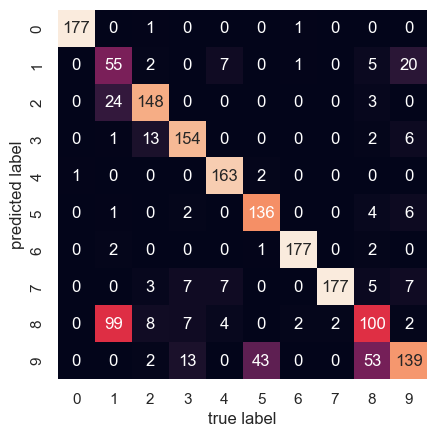

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

By running this code, we can visualize how well the clustering algorithm performed in grouping the digits into clusters.

In [18]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_19252\4118165493.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.9426822481914302

This code is evaluating the accuracy of the clustering results based on the t-SNE reduced data and the K-Means clustering algorithm. The accuracy score represents how well the clustering algorithm grouped the digits into clusters based on their t-SNE reduced features, using the true labels for comparison.

**Studi Kasus 2: Kompresi Citra**

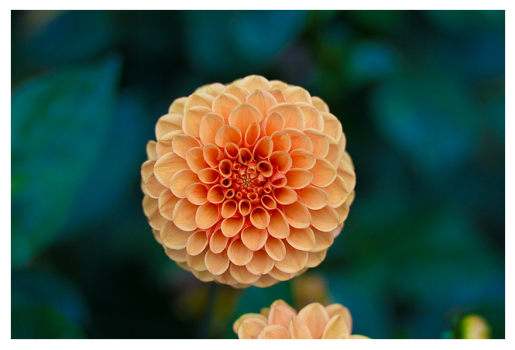

In [19]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

The code loads a sample image of a flower using the `load_sample_image` function from scikit-learn's datasets module. It then displays the image using Matplotlib. The resulting image is displayed without any axis ticks, creating a clean visualization of the flower image.

In [20]:
flower.shape

(427, 640, 3)

In [21]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

The flower image has been divided by 255.0 to scale its pixel values to the range [0, 1]. Then, the image has been reshaped into a 2D array with three columns corresponding to the RGB (Red, Green, Blue) channels. Each row in this 2D array represents a pixel in the image. Therefore, the data array has a shape of (273280, 3), where 273280 is the total number of pixels in the reshaped image, and 3 represents the RGB channels.

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

The plot_pixels function takes in a 2D array of pixel values (with RGB channels) and plots scatter plots for the Red vs. Green channels and Red vs. Blue channels. It allows visualization of pixel color distributions.

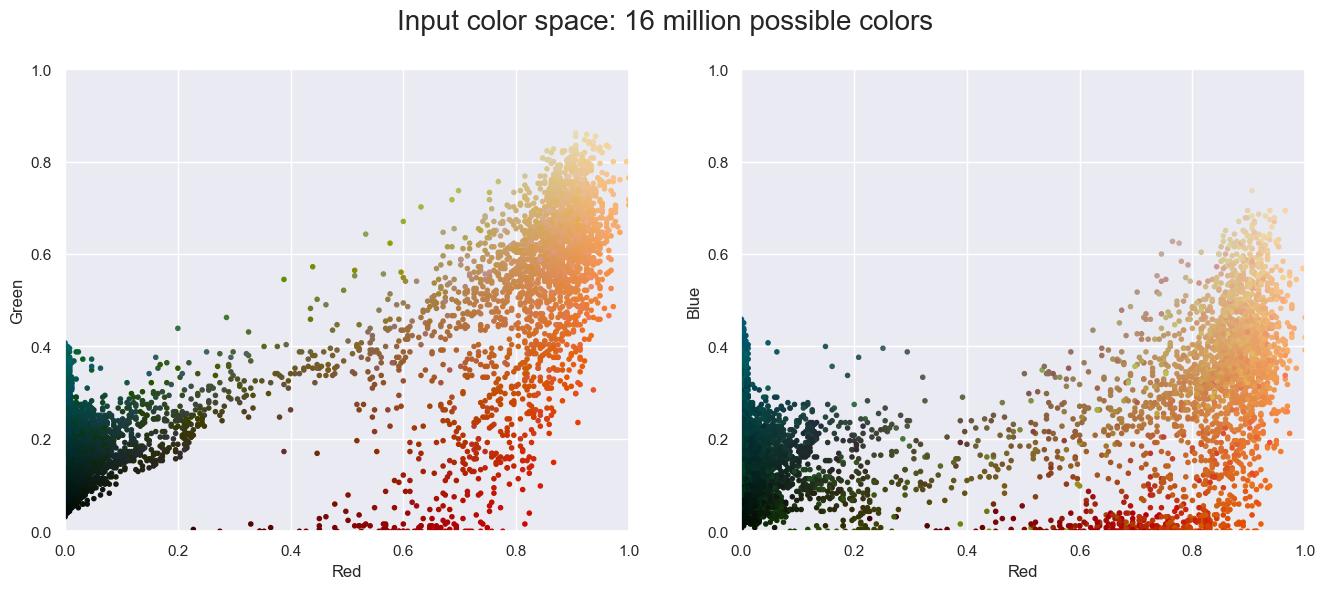

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

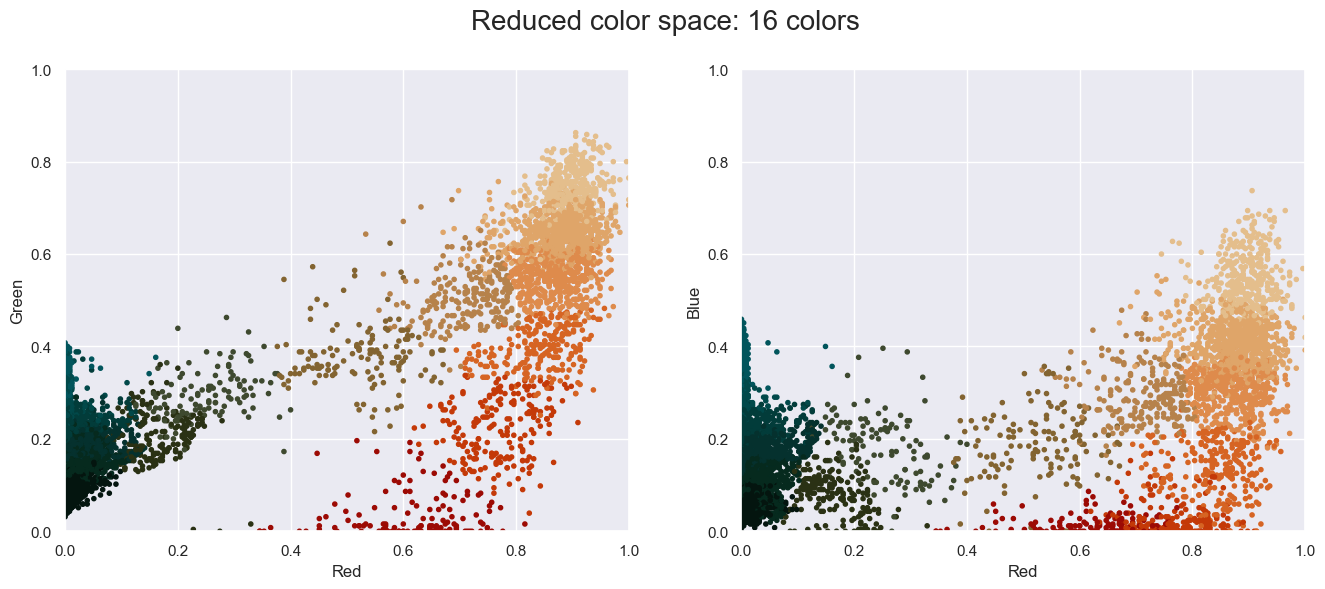

In [24]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

This code will reducing the color space using MiniBatchKMeans clustering to 16 colors. The provided code will create a reduced color space representation and visualize the pixel color distributions for these 16 colors.

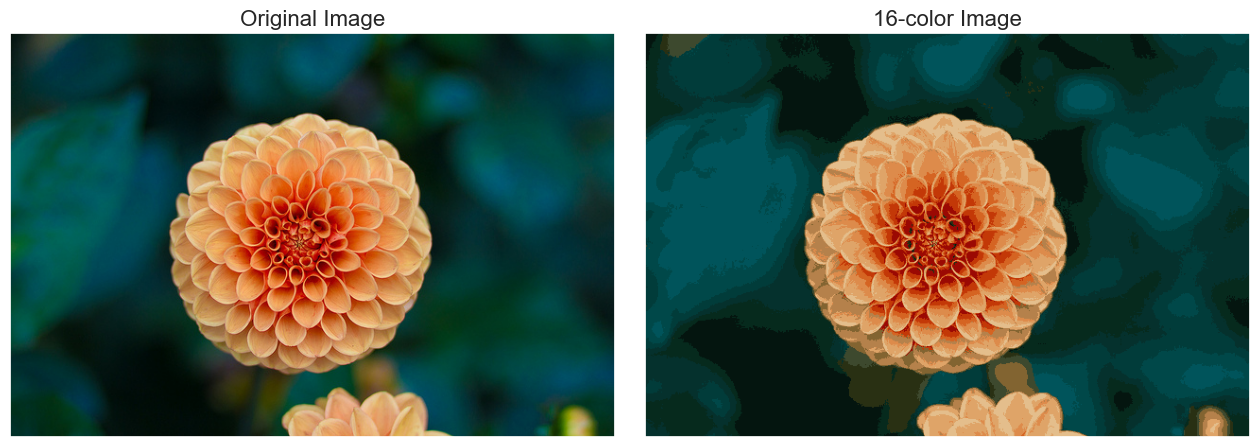

In [25]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

The code we provided will take the new_colors obtained from MiniBatchKMeans clustering, reshape them to match the shape of the original flower image, and then display both the original image and the recolored image using the reduced color palette.